In [2]:
#@title Setup (Do NOT modify)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/final
!pip install openai-clip

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=26d633bf0d8ddf784cd0fd1fdeee81495dcc9885dc0b520e332649beda7af4bf
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip


In [2]:
!nvidia-smi

Tue Dec 12 12:12:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#@title Data preprocessing (Train)
!python preproc_datasets_celeba_zip_train.py --source=./multimodal_celeba_hq.zip --dest train_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

Traceback (most recent call last):
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/preproc_datasets_celeba_zip_train.py", line 592, in <module>
    convert_dataset()  # pylint: disable=no-value-for-parameter
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/decorators.py", line 33, in new_func
    return f(get_current_context(), *args, **kwargs)
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/preproc_datasets_celeba_zip_t

In [4]:
#@title Data preprocessing (Test)
!python preproc_datasets_celeba_zip_test.py --source=./multimodal_celeba_hq.zip --dest test_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

Traceback (most recent call last):
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/preproc_datasets_celeba_zip_test.py", line 592, in <module>
    convert_dataset()  # pylint: disable=no-value-for-parameter
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/decorators.py", line 33, in new_func
    return f(get_current_context(), *args, **kwargs)
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/preproc_datasets_celeba_zip_te

In [5]:
%cd /content/drive/MyDrive/final

/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final


In [ ]:
#@title Train

train_data = "train_data_4cap.zip"#@param {"type": "string"}
batch_size = 24 #@param {"type": "integer"}
num_epochs = 10 #@param {"type": "integer"}
learning_rate = 0.0002 #@param {"type": "number"}
report_interval = 50 #@param {"type": "integer"}
noise_dim = 100 #@param {"type": "integer"}
projection_dim = 128 #@param {"type": "integer"}
clip_embedding_dim = 512 #@param {"type": "integer"}
checkpoint_path = "model_exp1" #@param {"type": "string"}
result_path = "images_exp1" #@param {"type": "string"}
use_uncond_loss = True #@param {"type": "boolean"}
use_contrastive_loss = True #@param {"type": "boolean"}
num_stage = 3 #@param {"type": "integer"}
resume_checkpoint_path = "None" #@param {"type": "string"}
resume_epoch = 5 #@param {"type": "integer"}

test_cmd = f'''python main.py \
    --train_data "{train_data}" \
    --batch_size {batch_size} \
    --num_epochs {num_epochs} \
    --learning_rate {learning_rate} \
    --report_interval {report_interval} \
    --noise_dim {noise_dim} \
    --projection_dim {projection_dim} \
    --clip_embedding_dim {clip_embedding_dim} \
    --checkpoint_path "{checkpoint_path}" \
    --result_path "{result_path}" \
    --num_stage {num_stage} \
    --resume_epoch {resume_epoch} \
    '''
if use_uncond_loss:
    test_cmd += "--use_uncond_loss "
if use_contrastive_loss:
    test_cmd += "--use_contrastive_loss "
if resume_checkpoint_path != "None":
    test_cmd += f'''--resume_checkpoint_path "{resume_checkpoint_path}"'''

with open('./train_script.sh', 'w') as file:
    file.write(test_cmd)

!bash train_script.sh

Loading dataset
finish
Epoch: 6 start
    Iteration 50 	 d_loss: 48515.6719, g_loss: 40985.1719
    Iteration 100 	 d_loss: 48540.3389, g_loss: 40803.8359
    Iteration 150 	 d_loss: 48438.5615, g_loss: 40708.9062
    Iteration 200 	 d_loss: 48437.5625, g_loss: 40608.9023
    Iteration 250 	 d_loss: 48377.1504, g_loss: 40630.4727
    Iteration 300 	 d_loss: 48401.8945, g_loss: 40604.8594
    Iteration 350 	 d_loss: 48412.3838, g_loss: 40545.3906
    Iteration 400 	 d_loss: 48435.3359, g_loss: 40575.8320
Traceback (most recent call last):
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/main.py", line 38, in <module>
    main()
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/main.py", line 35, in main
    train(args)
  File "/content/drive/.shortcut-targets-by-id/1BsTkexn7SBLvjQ9GdkiTy8cn3uASlI38/final/train.py", line 330, in train
    d_loss, g_loss, txt_feature = train_step(train_loader, noise_dim, device, G,

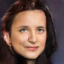

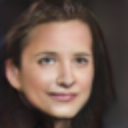

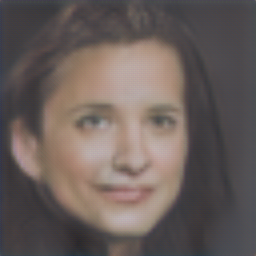

In [25]:
#@title Test (Generate image)
import shutil
prompt = "brown long hair"#@param {"type": "string"}
load_epoch = 24 #@param {"type": "integer"}
checkpoint_path = "model_exp1" #@param {"type": "string"}

test_cmd = f'''python generate_image.py \
    --prompt "{prompt}" \
    --load_epoch {load_epoch} \
    --checkpoint_path "{checkpoint_path}"
    '''

with open('./test_script.sh', 'w') as file:
    file.write(test_cmd)

!bash test_script.sh

from IPython.display import Image
import os
img_64 = Image(os.path.join("result_64.png"))
display(img_64)
img_128 = Image(os.path.join("result_128.png"))
display(img_128)
img_256 = Image(os.path.join("result_256.png"))
display(img_256)


mkdir: cannot create directory ‘/content/drive/My Drive/final/generated_image/test_without_contrastive_loss_epoch_24/test1’: File exists


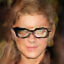

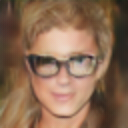

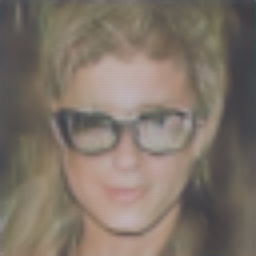

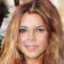

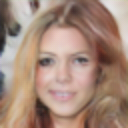

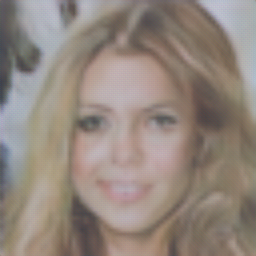

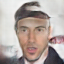

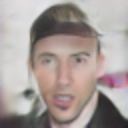

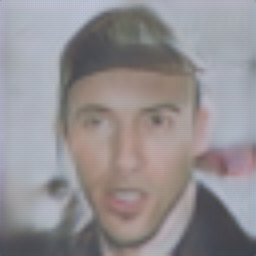

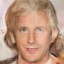

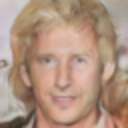

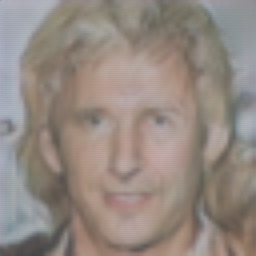

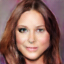

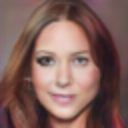

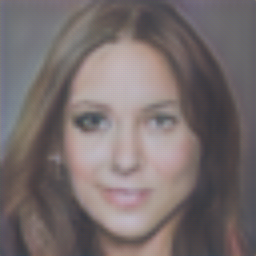

In [21]:
#@title Test (Generate image)
import shutil
prompt = "brown long hair"#@param {"type": "string"}
load_epoch = 24 #@param {"type": "integer"}
checkpoint_path = "model_exp1" #@param {"type": "string"}
test_num = 1 #@param {"type": "integer"}
num_images = 5 #@param {"type": "integer"}

test_cmd = f'''python generate_image.py \
    --prompt "{prompt}" \
    --load_epoch {load_epoch} \
    --checkpoint_path "{checkpoint_path}"
    '''
!mkdir "/content/drive/My Drive/final/generated_image/test_without_contrastive_loss_epoch_{load_epoch}/test{test_num}"


with open('./test_script.sh', 'w') as file:
    file.write(test_cmd)

with open("text.txt", "w") as text_file:
    text_file.write(prompt)

absolute_path = os.path.abspath("text.txt")
tx_de_path = f"/content/drive/My Drive/final/generated_image/test_without_contrastive_loss_epoch_{load_epoch}/test{test_num}/text.txt"
shutil.copy(absolute_path, tx_de_path)

for i in range(num_images):
  !bash test_script.sh


  from IPython.display import Image
  import os
  img_64 = Image(os.path.join("result_64.png"))
  display(img_64)
  img_128 = Image(os.path.join("result_128.png"))
  display(img_128)
  img_256 = Image(os.path.join("result_256.png"))
  display(img_256)


  # 이미지를 저장할 경로
  image_path = os.path.join("result_256.png")
  destination_path = f"/content/drive/My Drive/final/generated_image/test_without_contrastive_loss_epoch_{load_epoch}/test{test_num}/result_256_({i}).png"

  # 이미지를 Google 드라이브에 복사
  shutil.copy(image_path, destination_path)
